In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# BEGINNER LEVEL PROJECT

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
from keras.datasets import cifar10 
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [106]:
X_train.shape

(50000, 32, 32, 3)

In [107]:
X_test.shape

(10000, 32, 32, 3)

# DATA VISUALIZATION

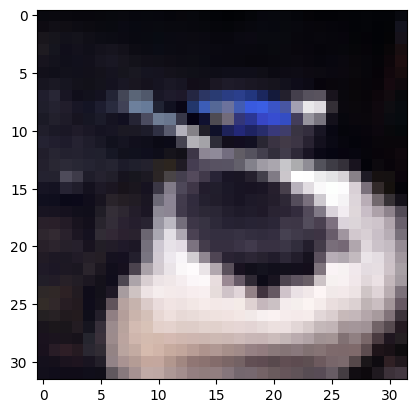

In [108]:
img = 1040
plt.imshow(X_train[img])

In [109]:
print(y_train[img]) # belongs to bird class

[2]


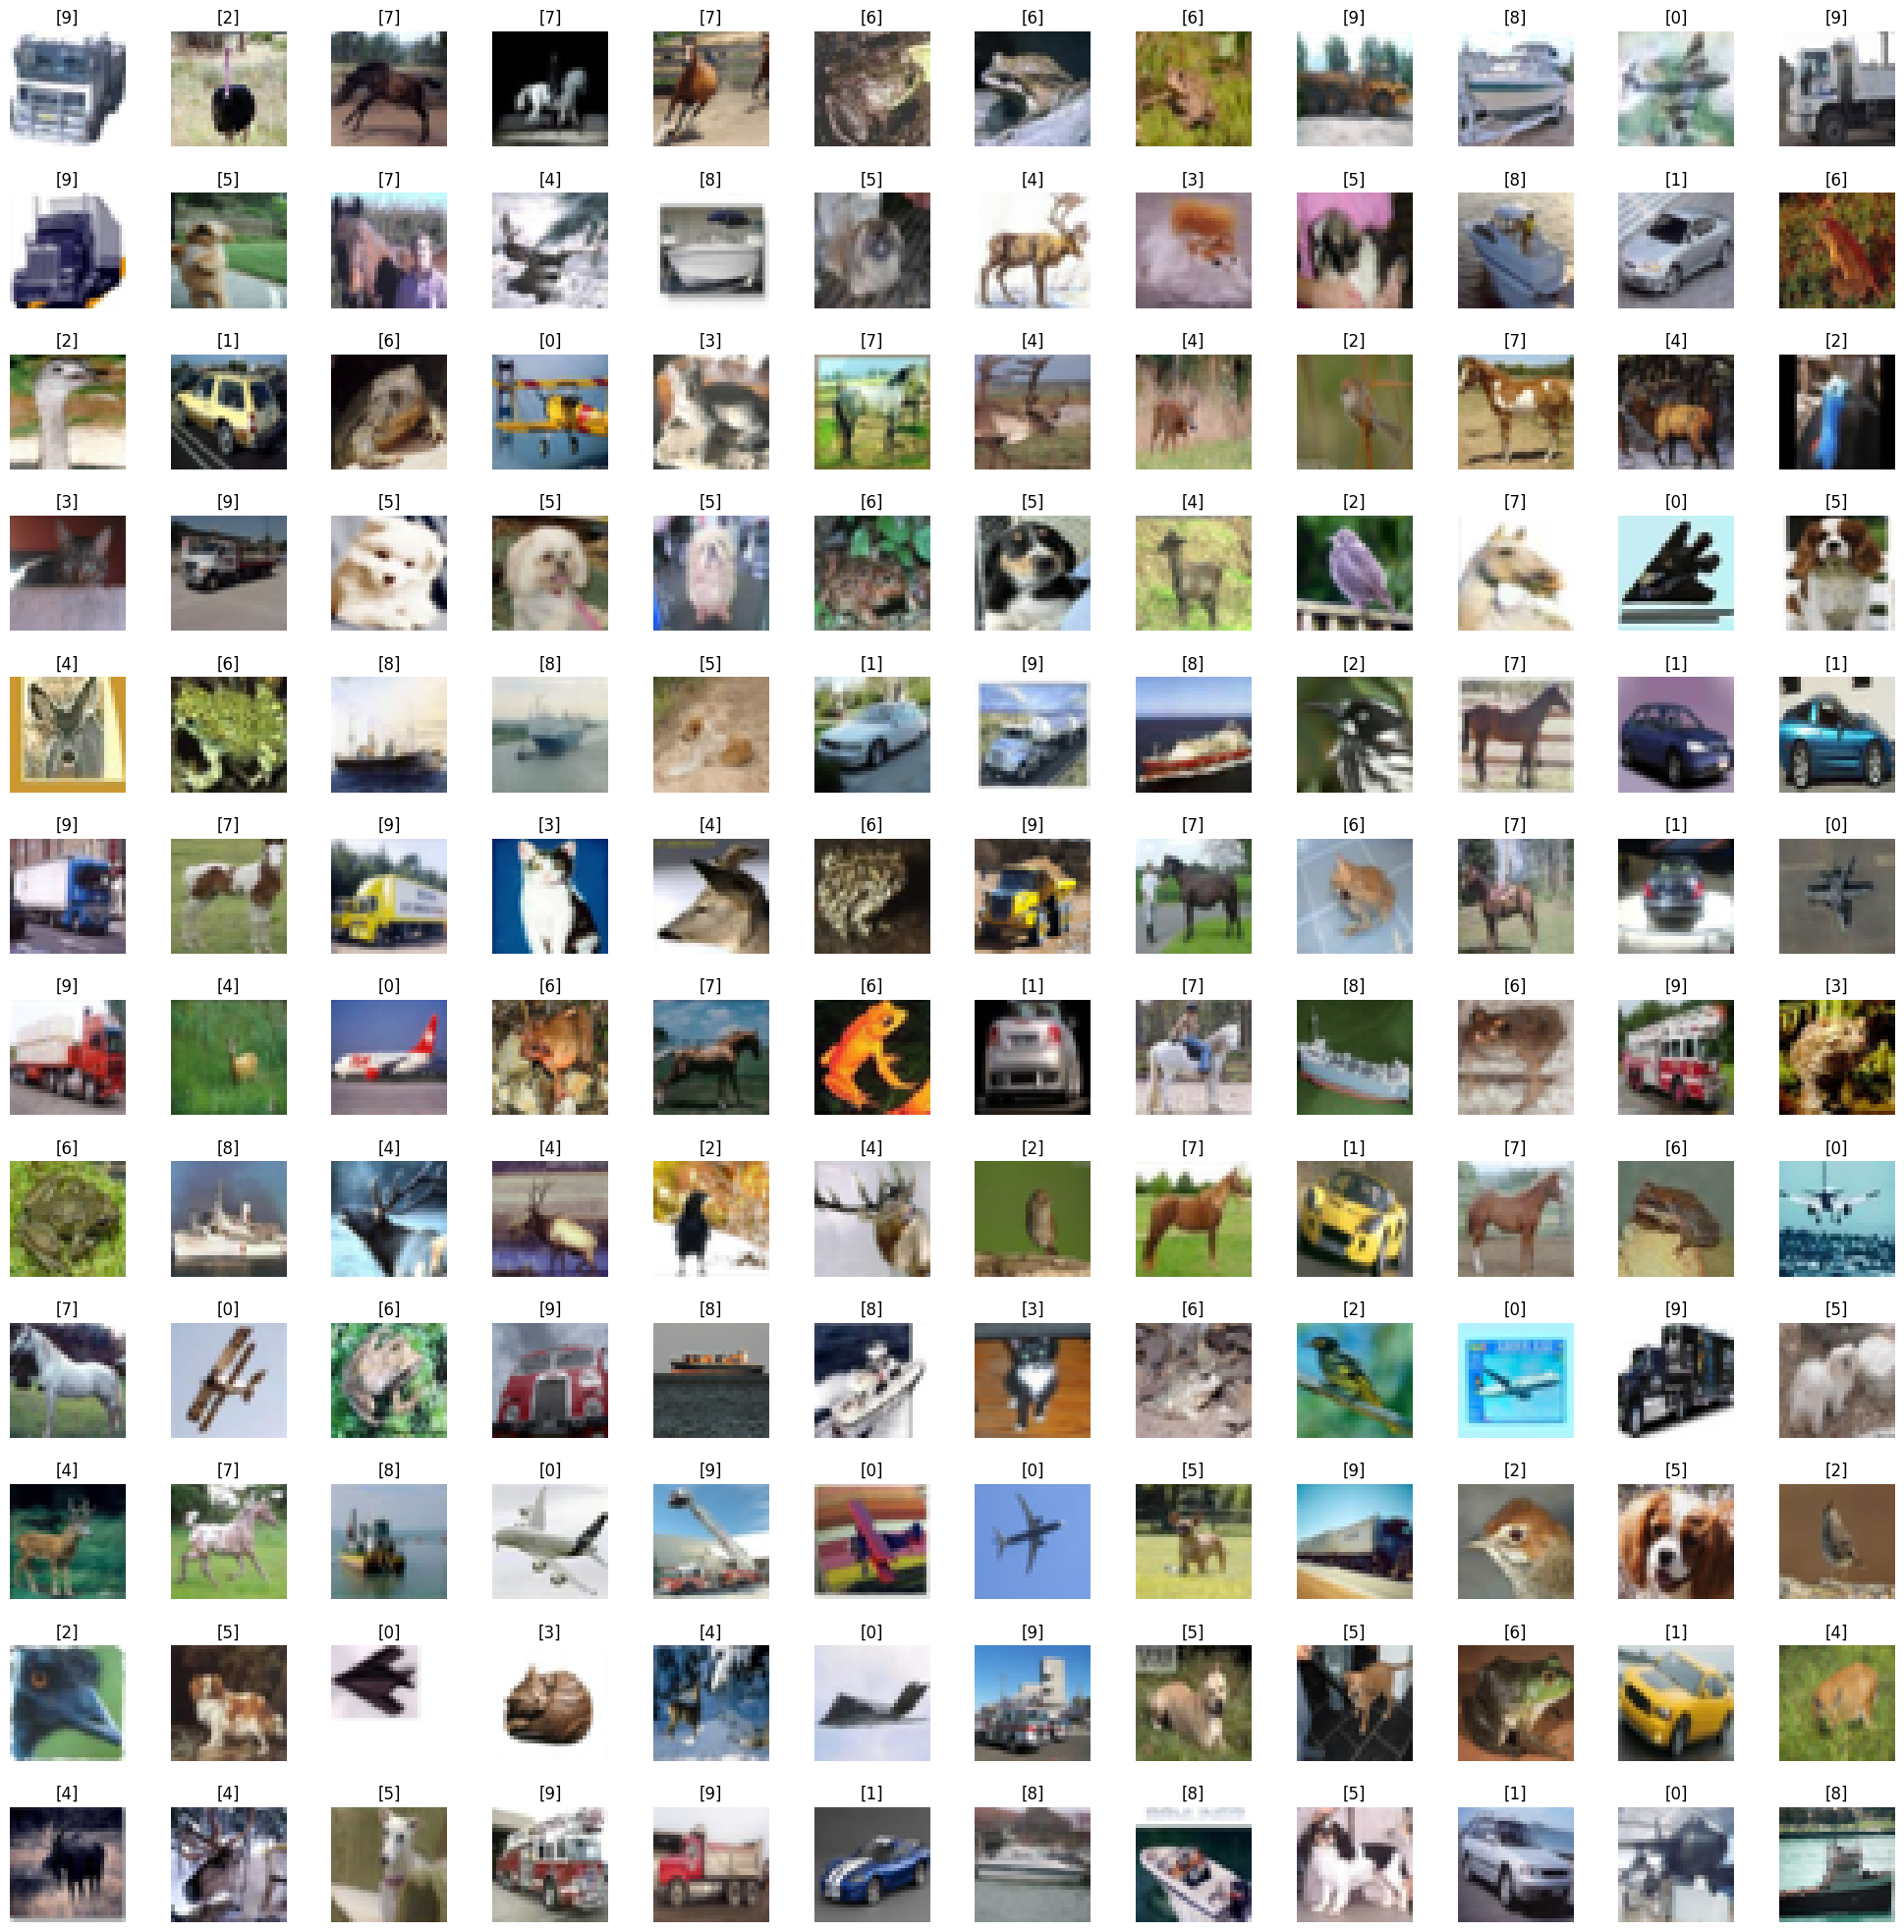

In [110]:
width_grid = 12
length_grid = 12

fig,axes = plt.subplots(length_grid,width_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

# picking and displaying random images from training data in a 15 * 15 grid
for i in np.arange(0,length_grid * width_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# DATA Preparation

In [111]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [112]:
cat_num = 10

In [113]:
import keras
y_train = keras.utils.to_categorical(y_train, cat_num)
y_test = keras.utils.to_categorical(y_test, cat_num)

In [114]:
# Normalizing

X_train = X_train/255
X_test = X_test/255

In [115]:
Input_shape = X_train.shape[1:]
print(f"Input shape: {input_shape}")

Input shape: (32, 32, 3)


# TRAINING THE MODEL

In [116]:
# Building a sequential model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten ,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [117]:
cnn_seq_model = Sequential()
#first layer
cnn_seq_model.add(Conv2D(filters = 32,kernel_size = (3,3),activation='relu',input_shape = Input_shape))
cnn_seq_model.add(Conv2D(filters = 32,kernel_size = (3,3),activation='relu'))
cnn_seq_model.add(MaxPooling2D(2,2))
cnn_seq_model.add(Dropout(0.3))

#Second layer
cnn_seq_model.add(Conv2D(filters = 32,kernel_size = (3,3),activation='relu'))
cnn_seq_model.add(Conv2D(filters = 32,kernel_size = (3,3),activation='relu'))
cnn_seq_model.add(MaxPooling2D(2,2))
cnn_seq_model.add(Dropout(0.2))

cnn_seq_model.add(Flatten())
# hidden layer
cnn_seq_model.add(Dense(units = 512,activation = 'relu'))
cnn_seq_model.add(Dense(units = 512,activation = 'relu'))

#output layer
cnn_seq_model.add(Dense(units=10,activation='softmax'))

In [118]:
cnn_seq_model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = cnn_seq_model.fit(X_train,y_train,batch_size = 64, epochs = 20, shuffle = True)

Epoch 1/20


In [ ]:
# saving the model
cnn_seq_model.save("cifar10_cnn_model.keras")

In [ ]:
# evaluating the model performance

evaluation_metrics = cnn_seq_model.evaluate(X_test,y_test)
print(f'Test Accuracy: {evaluation_metrics[1]}')

In [ ]:
import numpy as np

pred_probs = cnn_seq_model.predict(X_test)
predicted_classes = np.argmax(pred_probs, axis=1)
predicted_classes

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
l = 7
w = 7

fig,axes = plt.subplots(l,w, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,l * w):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=1.2)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

# True class vs model Prediction